<a href="https://colab.research.google.com/github/AbhisekLimbu/Modeling_Earthquake_Damage/blob/main/Richter_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

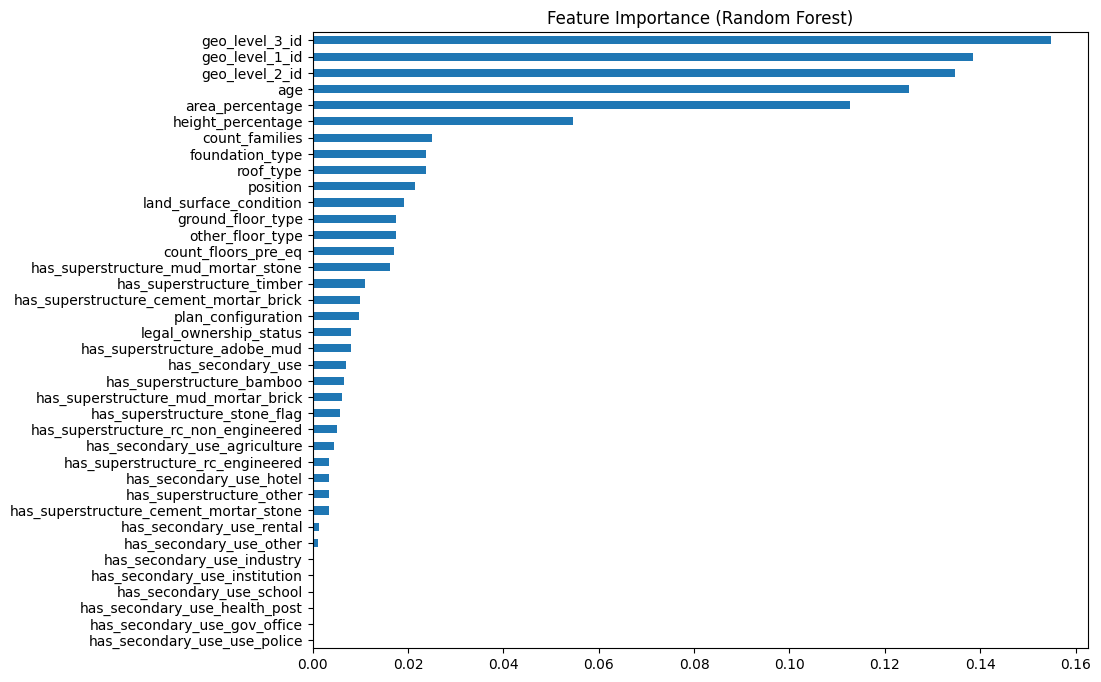

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


train_values = pd.read_csv("/train_values.csv")
train_labels = pd.read_csv("/train_labels.csv")

data = train_values.merge(train_labels, on="building_id")

X = data.drop(columns=["building_id", "damage_grade"])  # drop ID and target
y = data["damage_grade"]

X = X.fillna(0)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(10, 8))

plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
